# Introduction to Analyzing Congressional Records with Python in Jupyter Notebook

This guide will walk you through the process of analyzing a dataset of U.S. Congressional records using Python in a Jupyter Notebook environment. We'll explore the data, perform various analyses, and visualize the results. This process involves loading and processing text data, conducting descriptive and sentiment analyses, and applying natural language processing (NLP) techniques.

## Step 1: Setting Up Your Jupyter Notebook

Open Jupyter Notebook in your development environment. You can do this by launching your terminal or command prompt and running the command `jupyter notebook`. Navigate to your project directory and create a new notebook.

## Step 2: Import Necessary Libraries

Before starting our analysis, we need to import several Python libraries that will help us process and analyze the data. Below is a brief overview of each library and what it's used for:

- `os`: Provides a way of using operating system-dependent functionality. [Learn more](https://docs.python.org/3/library/os.html).
- `nltk`: The Natural Language Toolkit, used for working with human language data. [Learn more](https://www.nltk.org/).
- `pandas`: A data analysis and manipulation library. [Learn more](https://pandas.pydata.org/).
- `matplotlib.pyplot`: A plotting library for creating various types of graphs and charts. [Learn more](https://matplotlib.org/stable/tutorials/introductory/pyplot.html).
- `WordCloud`: Used for generating word clouds. [Learn more](https://amueller.github.io/word_cloud/).
- `nltk.tokenize.word_tokenize`: Function for tokenizing strings. [Learn more](https://www.nltk.org/api/nltk.tokenize.html).
- `nltk.corpus.stopwords`: Provides a list of 'stop words'. [Learn more](https://www.nltk.org/nltk_data/).
- `nltk.probability.FreqDist`: Used for the frequency distribution of words. [Learn more](https://www.nltk.org/api/nltk.probability.html).
- `nltk.sentiment.SentimentIntensityAnalyzer`: Tool for determining the sentiment of a text. [Learn more](https://www.nltk.org/api/nltk.sentiment.html).
- `gensim`: Used for topic modeling and document similarity. [Learn more](https://radimrehurek.com/gensim/).
- `tqdm`: A library for providing progress bars to loops. [Learn more](https://tqdm.github.io/).


In [1]:
import os
import nltk
import pandas as pd
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer
from gensim import corpora, models
from tqdm import tqdm

# Ensure the necessary NLTK datasets are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to C:\Users\Tianyi
[nltk_data]     Zhang\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Tianyi
[nltk_data]     Zhang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\Tianyi
[nltk_data]     Zhang\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Step 3: Loading the Data

To begin our analysis, we first need to load the text data from the Congressional records. We will define a function `load_text_files` to read text files from a specified directory and store their contents in a dictionary for easy access. This function utilizes `tqdm` for showing a progress bar, which helps in tracking the file-loading process, especially useful when dealing with a large number of files.

### The `load_text_files` Function

This function takes a directory path as input and reads each text file, storing its contents in a dictionary. The keys of the dictionary are the file names, and the values are the contents of the files.


In [3]:
# Read the processed text files into a dictionary
def load_text_files(directory):
    text_data = {}
    for i in tqdm(range(104, 119), desc="Loading Files"):
        file_path = os.path.join(directory, f'Processed_Congress_{i}.txt')
        with open(file_path, 'r', encoding='utf-8') as file:
            text_data[f'Congress_{i}'] = file.read()
    return text_data

### Loading the Dataset
Now, let's call this function to load our dataset. Make sure to replace the path with the path to your data directory.

In [2]:
'''
Put the text data into a dataframe
Make sure to replace with your own directory path with the processed text files
'''

dataset = load_text_files('YOUR DIRECTORY PATH HERE')

NameError: name 'load_text_files' is not defined

After running this code, you will have a dictionary named `dataset` where each Congressional record is stored as a text value, accessible using its corresponding key.

## Step 4: Frequency Analysis

After loading the data, the next step is to perform a frequency analysis. This will help us identify the most commonly used words in the Congressional records. Frequency analysis is a fundamental technique in text analysis that allows us to get a sense of the most prominent themes and topics in the text.

### Step 4.1: Tokenization and Frequency Distribution

First, we'll tokenize the text, breaking it down into individual words. Then, we'll use the `FreqDist` function from NLTK to create a frequency distribution, which counts the occurrences of each word.


In [5]:
# Combine all text data for frequency analysis
all_text = ' '.join(dataset.values())

# Tokenize the text
tokens = word_tokenize(all_text)

# Create a frequency distribution
fdist = FreqDist(tokens)

### Step 4.2: Identifying Common Words

Next, we can identify the most common words in the dataset. This gives us a quick overview of the key terms and topics being discussed in the Congressional records.


In [6]:
# Displaying the 500 - 1000 most common words
common_words = fdist.most_common(500)  # Adjust number as needed
print(common_words)

[('mr', 2103653), ('senat', 2013819), ('state', 1977398), ('presid', 1542148), ('year', 1344007), ('amend', 1278899), ('section', 1273255), ('act', 1265736), ('shall', 1199375), ('bill', 1107636), ('unit', 1024489), ('provid', 928020), ('b', 914974), ('would', 900377), ('program', 877733), ('nation', 864781), ('offic', 863128), ('committe', 823330), ('secretari', 801666), ('c', 748984), ('servic', 733764), ('follow', 719939), ('may', 718476), ('feder', 703500), ('time', 676112), ('law', 664761), ('fund', 651973), ('us', 639340), ('includ', 638798), ('peopl', 625885), ('work', 621940), ('report', 607739), ('use', 599655), ('requir', 590529), ('author', 589185), ('subsect', 584216), ('make', 574958), ('one', 571527), ('health', 570073), ('secur', 560702), ('new', 555837), ('go', 552039), ('gener', 550322), ('appropri', 536963), ('american', 523759), ('order', 522837), ('titl', 506026), ('govern', 494713), ('depart', 494219), ('sec', 487794), ('support', 486882), ('need', 486597), ('parag

### Step 4.3: Creating a Custom Stop Words List
After displaying the most common words in our dataset, it becomes evident that even with the use of NLTK's stop words removal, there are still words that may not be particularly meaningful or insightful in the context of our specific analysis. This observation underscores an important aspect of text analysis: the identification and removal of stop words can often be a subjective process, heavily dependent on the nature of the dataset and the specific goals of the research.

#### The Subjectivity of Defining Stop Words

While standard stop word lists (like the one provided by NLTK) are a great starting point, they often need to be supplemented with a custom list of words that are identified based on the context and content of the dataset. What constitutes a 'stop word' can vary greatly depending on the subject matter, the nature of the text, and the research questions being addressed.

#### Tailoring the Stop Words List to Your Dataset

It is essential for researchers to carefully review the most frequent words in their datasets and decide which ones are not contributing to their specific analytical goals. This process involves:

- Identifying words that are highly frequent but contextually irrelevant or too generic.
- Considering the research objectives and how certain words may or may not align with these goals.
- Continuously refining the stop words list as more insights are gained about the dataset during the analysis.

#### Finding the Balance

Ultimately, the determination of what constitutes a stop word in your analysis is a balance that each researcher must strike, based on their knowledge of the dataset and the specific needs of their research. This is a dynamic process, and it is not uncommon to revisit and revise your list of stop words as you explore more into the data.


#### Generating a Candidate List of Custom Stop Words
Let's first print out a list of the most common words (500-1000 words) to manually identify and create a list of additional stop words.

In [7]:
# Adjust the number to print out more words if needed
for word, frequency in fdist.most_common(1000):
    print(word, frequency)

mr 2103653
senat 2013819
state 1977398
presid 1542148
year 1344007
amend 1278899
section 1273255
act 1265736
shall 1199375
bill 1107636
unit 1024489
provid 928020
b 914974
would 900377
program 877733
nation 864781
offic 863128
committe 823330
secretari 801666
c 748984
servic 733764
follow 719939
may 718476
feder 703500
time 676112
law 664761
fund 651973
us 639340
includ 638798
peopl 625885
work 621940
report 607739
use 599655
requir 590529
author 589185
subsect 584216
make 574958
one 571527
health 570073
secur 560702
new 555837
go 552039
gener 550322
appropri 536963
american 523759
order 522837
titl 506026
govern 494713
depart 494219
sec 487794
support 486882
need 486597
paragraph 477704
commun 475940
public 472075
hous 463593
administr 452002
legisl 439383
countri 433947
purpos 425181
plan 422347
congress 419834
agenc 412196
made 410818
member 410292
insert 407517
amount 406694
tax 396189
assist 393833
f 391716
care 391455
vote 390037
fiscal 386380
develop 386108
say 385336
right 3846

After this step, we will have a clearer understanding of which words to filter out in subsequent analyses to refine our focus on more meaningful and insightful content in the Congressional records. Then, create a custom list of stop words to remove.

In [8]:
custom_stop_words = [
    'mr', 'state', 'presid', 'year', 'shall', 'unit', 'b', 'would', 'program', 
    'offic', 'c', 'servic', 'follow', 'may', 'time', 'includ','report', 'use',
    'requir', 'author', 'subsect','make', 'one', 'secur', 'new', 'go', 'gener', 'appropri', 
    'american', 'order', 'titl', 'govern', 'depart', 'sec', 'support', 'need', 'paragraph', 
    'hous', 'administr', 'legisl', 'countri', 'purpos', 'plan', 
    'congress', 'agenc', 'made', 'member', 'insert', 'amount', 'assist', 
    'f', 'care', 'vote', 'fiscal', 'develop', 'say', 'right', 'day', 'term', 
    'educ', 'system', 'get', 'r', 'record', 'propos', 'e', 'end', 'busi', 'issu', 
    'percent', 'also', 'inform', 'receiv', 'want', 'strike', 'take', 'defens', 
    'rule', 'date', 'ask', 'relat', 'mani', 'individu', 'cost', 
    'activ', 'ii', 'know', 'usc', 'import', 'increas', 'first', 
    'today', 'avail', 'think', 'determin', 'person', 'submit', 'provis', 
    'call', 'mean', 'establish', 'without', 'way', 'forc', 'come', 
    'respect', 'effect', 'oper', 'resolut', 'help', 'continu', 'ad', 'like', 
    'said', 'part', 'po', 'frm', 'fmt', 'jkt', 'sfmt', 'verdat', 
    'request', 'colleagu', 'describ', 'grant', 'case', 'n', 'applic', 'manag', 
    'repres', 'million', 'code', 'object', 'period', 'could', 'last',
    'court', 'benefit', 'number', 'pursuant', 'area', 'subparagraph', 'respons',
    'action', 'well', 'chang', 'serv', 'consent', 'interest', 'major', 'improv', 
    'allow', 'pass', 'enact', 'l', 'even', 'everi', 'believ', 'good', 
    'name', 'meet', 'place', 'process', 'p', 'effort', 'account', 
    'commiss', 'unanim', 'insur', 'billion', 'design', 'world', 'let', 
    'carri', 'consid', 'floor', 'result', 'appli', 'ms', 'later', 
    'back', 'nomin', 'director', 'money', 'ensur', 'two', 'small',  
    'reason', 'live', 'resourc', 'compani', 'read', 'fact', 'thing', 
    'rate', 'elig', 'line', 'concern', 'facil', 'drug', 'current', 
    'tabl', 'h', 'home', 'much', 'see', 'within', 'must', 'give', 'debat', 'agre', 
    'opportun', 'address', 'put', 'talk', 'begin', 'g', 
    'entiti', 'look', 'spend', 'standard', 'institut', 'necessari', 
    'review', 'problem', 'hope', 'month', 'point', 'clerk', 'offer', 'j', 'base', 
    'hear', 'train', 'level', 'enforc', 'thank', 'find', 'wherea', 
    'access', 'intend', 'conduct', 'whether', 'recogn', 'great', 'associ', 
    'district', 'septemb', 'tri', 'elect', 'women', 'execut', 
    'proceed', 'week', 'prevent', 'implement', 'creat', 'move', 'medic', 'center', 
    'reduc', 'accord', 'question', 'iii', 'particip', 
    'judg', 'less', 'direct','congression', 'set', 'polit', 'board', 'subject', 
    'group', 'matter', 'cosponsor', 'understand', 'anoth', 'privat', 'approv',
    'arm', 'yield', 'futur', 'sa', 'reserv', 'commit', 'remain', 'refer', 'entitl',
    'abl', 'cut', 'done', 'transmit', 'total', 'certain', 'posit', 'mar', 'construct', 
    'cover', 'final', 'washington', 'worker', 'differ', 'regard', 'w', 'constitut',
    'sinc', 'long', 'second', 'decis', 'head', 'happen', 'page', 'practic', 'side', 
    'upon', 'next', 'perform', 'properti', 'high', 'contribut', 'transfer',  'hr', 
    'special', 'appoint', 'better', 'complet', 'involv', 'measur',  'best', 
    'share', 'k', 'statement', 'procedur', 'condit', 'exist', 'lot',  'produc',
    'senat', 'act', 'amend', 'provid', 'bill', 'committe', 'sen', 'congress', 'hous',
    'feder', 'nation', 'flooraccord', 'section', 'law', 'peopl'
    # ... Add more words as necessary
]

This list includes words that are typically found in formal legislative documents and may not provide insights into specific discussions or topics. It is, however, important to carefully consider each word before adding it to the list, as some words might be relevant depending on the context of your analysis.

In [9]:
# Filtering out custom stop words from the original tokens
refined_tokens = [word for word in tokens if word not in custom_stop_words]

# Creating a new frequency distribution with the refined tokens
refined_fdist = FreqDist(refined_tokens)

# Displaying the most common words after applying the custom stop words filter
refined_common_words = refined_fdist.most_common(20)
print(refined_common_words)

[('secretari', 801666), ('fund', 651973), ('us', 639340), ('work', 621940), ('health', 570073), ('commun', 475940), ('public', 472075), ('tax', 396189), ('protect', 330992), ('famili', 329651), ('budget', 317895), ('energi', 293676), ('school', 283366), ('project', 267950), ('militari', 248963), ('polici', 243545), ('america', 238697), ('children', 238252), ('addit', 238029), ('pay', 234983)]


By implementing this additional filtering step, we aim to isolate terms that are more insightful and indicative of the specific discussions and themes present in the Congressional records.

### Step 4.4: Creating a Word Cloud
A word cloud is a visual representation of text data where the size of each word indicates its frequency or importance. We'll create a word cloud to visually represent the frequency of words in our dataset.

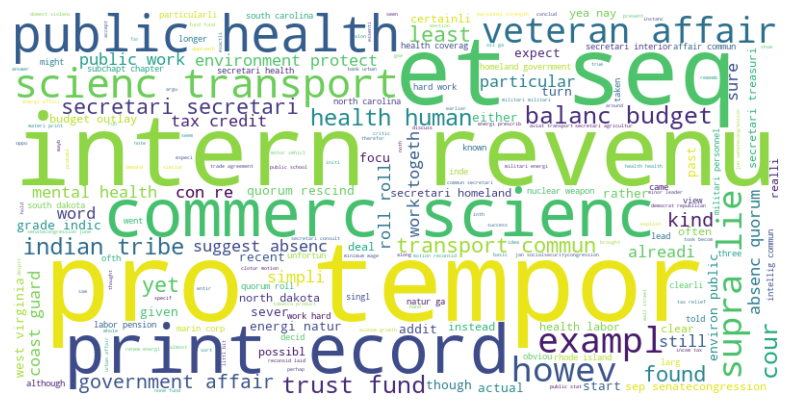

In [10]:
# Ensure refined_text is a string by joining the refined tokens
refined_text = ' '.join(refined_tokens)

# Create the word cloud from the refined text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(refined_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Step 5: Topic Modeling
After refining our dataset by removing custom stop words and visualizing the most frequent words, our next step is to perform topic modeling. Topic modeling is a type of statistical modeling for discovering abstract topics that occur in a collection of documents. It helps in understanding the underlying themes or topics in the text data.

### Applying Latent Dirichlet Allocation (LDA)
Latent Dirichlet Allocation (LDA) is one of the most popular methods for topic modeling. It assumes that each document is a mixture of topics and each topic is a mixture of words.

#### Step 5.1: Preparing Data for LDA
Before we can apply LDA, we need to prepare our data. This involves creating a dictionary and a corpus needed for topic modeling. In this step, we load and preprocess text data from U.S. Congressional records, preparing it for topic modeling. The process involves reading text files, tokenizing the text, and filtering out custom stop words. This will help in refining the text data to focus on meaningful content for analysis.

- Custom Stop Words: Custom stop words are specific to our dataset. They include commonly occurring words in legislative texts that might not be relevant for analyzing specific topics or themes. Examples include formal terms like 'amend', 'section', 'act', etc.

- Tokenization: Tokenization is the process of breaking down the text into individual words or tokens. This step is crucial for analyzing the frequency of words and preparing the text for further NLP tasks.

- Removal of Custom Stop Words: After tokenization, we remove custom stop words from our tokens. This step ensures that our analysis focuses on more insightful and contextually relevant terms.

The code below demonstrates how to load text files, tokenize the content, and filter out custom stop words. It stores the processed tokens for each Congress session in a dictionary, making them readily available for analysis.

In [11]:
import os
from nltk.tokenize import word_tokenize
from gensim import corpora
from tqdm import tqdm

# Define custom stopwords
custom_stop_words = [
    'mr', 'state', 'presid', 'year', 'shall', 'unit', 'b', 'would', 'program', 
    'offic', 'c', 'servic', 'follow', 'may', 'time', 'includ','report', 'use',
    'requir', 'author', 'subsect','make', 'one', 'secur', 'new', 'go', 'gener', 'appropri', 
    'american', 'order', 'titl', 'govern', 'depart', 'sec', 'support', 'need', 'paragraph', 
    'hous', 'administr', 'legisl', 'countri', 'purpos', 'plan', 
    'congress', 'agenc', 'made', 'member', 'insert', 'amount', 'assist', 
    'f', 'care', 'vote', 'fiscal', 'develop', 'say', 'right', 'day', 'term', 
    'educ', 'system', 'get', 'r', 'record', 'propos', 'e', 'end', 'busi', 'issu', 
    'percent', 'also', 'inform', 'receiv', 'want', 'strike', 'take', 'defens', 
    'rule', 'date', 'ask', 'relat', 'mani', 'individu', 'cost', 
    'activ', 'ii', 'know', 'usc', 'import', 'increas', 'first', 
    'today', 'avail', 'think', 'determin', 'person', 'submit', 'provis', 
    'call', 'mean', 'establish', 'without', 'way', 'forc', 'come', 
    'respect', 'effect', 'oper', 'resolut', 'help', 'continu', 'ad', 'like', 
    'said', 'part', 'po', 'frm', 'fmt', 'jkt', 'sfmt', 'verdat', 
    'request', 'colleagu', 'describ', 'grant', 'case', 'n', 'applic', 'manag', 
    'repres', 'million', 'code', 'object', 'period', 'could', 'last',
    'court', 'benefit', 'number', 'pursuant', 'area', 'subparagraph', 'respons',
    'action', 'well', 'chang', 'serv', 'consent', 'interest', 'major', 'improv', 
    'allow', 'pass', 'enact', 'l', 'even', 'everi', 'believ', 'good', 
    'name', 'meet', 'place', 'process', 'p', 'effort', 'account', 
    'commiss', 'unanim', 'insur', 'billion', 'design', 'world', 'let', 
    'carri', 'consid', 'floor', 'result', 'appli', 'ms', 'later', 
    'back', 'nomin', 'director', 'money', 'ensur', 'two', 'small',  
    'reason', 'live', 'resourc', 'compani', 'read', 'fact', 'thing', 
    'rate', 'elig', 'line', 'concern', 'facil', 'drug', 'current', 
    'tabl', 'h', 'home', 'much', 'see', 'within', 'must', 'give', 'debat', 'agre', 
    'opportun', 'address', 'put', 'talk', 'begin', 'g', 
    'entiti', 'look', 'spend', 'standard', 'institut', 'necessari', 
    'review', 'problem', 'hope', 'month', 'point', 'clerk', 'offer', 'j', 'base', 
    'hear', 'train', 'level', 'enforc', 'thank', 'find', 'wherea', 
    'access', 'intend', 'conduct', 'whether', 'recogn', 'great', 'associ', 
    'district', 'septemb', 'tri', 'elect', 'women', 'execut', 
    'proceed', 'week', 'prevent', 'implement', 'creat', 'move', 'medic', 'center', 
    'reduc', 'accord', 'question', 'iii', 'particip', 
    'judg', 'less', 'direct','congression', 'set', 'polit', 'board', 'subject', 
    'group', 'matter', 'cosponsor', 'understand', 'anoth', 'privat', 'approv',
    'arm', 'yield', 'futur', 'sa', 'reserv', 'commit', 'remain', 'refer', 'entitl',
    'abl', 'cut', 'done', 'transmit', 'total', 'certain', 'posit', 'mar', 'construct', 
    'cover', 'final', 'washington', 'worker', 'differ', 'regard', 'w', 'constitut',
    'sinc', 'long', 'second', 'decis', 'head', 'happen', 'page', 'practic', 'side', 
    'upon', 'next', 'perform', 'properti', 'high', 'contribut', 'transfer',  'hr', 
    'special', 'appoint', 'better', 'complet', 'involv', 'measur',  'best', 
    'share', 'k', 'statement', 'procedur', 'condit', 'exist', 'lot',  'produc',
    'senat', 'act', 'amend', 'provid', 'bill', 'committe', 'sen', 'congress', 'hous',
    'feder', 'nation', 'flooraccord', 'section', 'law', 'peopl'
    # ... Add more words as necessary
]

def load_and_preprocess(directory):
    text_data = {}
    for i in tqdm(range(104, 119), desc="Loading Files"):
        file_path = os.path.join(directory, f'Processed_Congress_{i}.txt')
        with open(file_path, 'r', encoding='utf-8') as file:
            # Tokenization and converting to lower case
            tokens = word_tokenize(file.read().lower())
            # Remove custom stopwords
            tokens = [word for word in tokens if word not in custom_stop_words]
            # Store tokens
            text_data[f'Congress_{i}'] = tokens
    return text_data

# Update with your directory path
directory = 'YOUR DIRECTORY PATH HERE'
dataset = load_and_preprocess(directory)

# Displaying the first few tokens of the first document as a sample
print(f"Sample tokens from Congress 104: {dataset['Congress_104'][:10]}")

Loading Files: 100%|██████████| 15/15 [11:32<00:00, 46.18s/it]

Sample tokens from Congress 104: ['recordunumepluribu', 'statesof', 'america', 'session', 'bullet', 'symbol', 'identifi', 'spoken', 'vol', 'friday']


#### Step 5.2: Topic Modeling with LDA

After preprocessing the text data, we move to the core part of our analysis: Topic Modeling. We use Latent Dirichlet Allocation (LDA), a popular technique in NLP for extracting topics from a collection of texts. Before running LDA, we need to prepare two key components:

- Dictionary: A mapping of word IDs to words. It is used to determine the vocabulary size and to convert word tokens to their respective IDs.
- Corpus: A representation of our text data in a bag-of-words format, where each document is converted into a vector indicating the frequency of each word.

We train an LDA model on our corpus, specifying the number of topics to extract and the number of passes through the dataset. The num_topics parameter decides how many topics the model should identify. The passes parameter affects how well the model will converge to a solution.

In [12]:
from gensim.models import LdaMulticore
from gensim.models import LdaModel
from tqdm import tqdm

# Create dictionary and corpus required for Topic Modeling
dictionary = corpora.Dictionary([tokens for tokens in dataset.values()])
corpus = [dictionary.doc2bow(text) for text in dataset.values()]

# Choose the LdaMulticore if you have a multi-core CPU
use_multicore = True  # Set to False if you don't want to use multicore processing
number_of_topics = 10
number_of_passes = 10

# Train LDA model using LdaMulticore for faster processing on multi-core CPUs
# Setting alpha and eta to 'symmetric' for manual tuning
if use_multicore:
    lda_multicore_model = LdaMulticore(corpus, num_topics=number_of_topics, id2word=dictionary, passes=number_of_passes, workers=10, alpha='symmetric', eta='symmetric')
else:
    # If you decide not to use multicore, use LdaModel instead
    lda_model = LdaModel(corpus, num_topics=number_of_topics, id2word=dictionary, passes=number_of_passes, alpha='auto', eta='auto')

# Wrap the training process with tqdm for a progress bar
for i in tqdm(range(number_of_passes)):
    if use_multicore:
        lda_multicore_model.update(corpus)
    else:
        lda_model.update(corpus)

# Displaying the Topics
model_to_use = lda_multicore_model if use_multicore else lda_model
for idx, topic in model_to_use.print_topics(-1):
    print(f"Topic {idx}: {topic}")

100%|██████████| 10/10 [22:37<00:00, 135.80s/it]

Topic 0: 0.008*"secretari" + 0.006*"health" + 0.006*"us" + 0.005*"fund" + 0.005*"work" + 0.005*"energi" + 0.004*"commun" + 0.004*"public" + 0.004*"tax" + 0.003*"famili"
Topic 1: 0.008*"secretari" + 0.005*"fund" + 0.005*"commun" + 0.005*"work" + 0.004*"public" + 0.004*"us" + 0.004*"militari" + 0.004*"health" + 0.003*"sep" + 0.003*"protect"
Topic 2: 0.008*"secretari" + 0.006*"fund" + 0.005*"us" + 0.005*"work" + 0.005*"health" + 0.004*"public" + 0.004*"commun" + 0.003*"employ" + 0.003*"protect" + 0.003*"tax"
Topic 3: 0.007*"fund" + 0.006*"secretari" + 0.005*"us" + 0.005*"work" + 0.005*"tax" + 0.004*"health" + 0.004*"commun" + 0.004*"public" + 0.003*"transport" + 0.003*"project"
Topic 4: 0.007*"secretari" + 0.006*"school" + 0.005*"fund" + 0.005*"energi" + 0.005*"health" + 0.004*"commun" + 0.004*"work" + 0.004*"us" + 0.003*"public" + 0.003*"local"
Topic 5: 0.005*"us" + 0.005*"fund" + 0.005*"secretari" + 0.004*"work" + 0.004*"budget" + 0.004*"public" + 0.003*"tax" + 0.003*"health" + 0.003*"c